# New York City Motor Vehicle Collision Report

Every large city struggles from one of the several common problems. The main ones are congestion, crimes, and motor vehicle accidents. The effect of these factors on such a large metropolis as New York is evident to anyone who has ever lived in the city: traffic is impossible to avoid, the number of vehicle collisions has increased year over year, the number of crimes, while decreasing is still one of the highest in the nation. 
The importance and abundance of all of the above-mentioned factors in NYC served as the motivation for this project. Our team wanted to cover the motor vehicle collisions as well as crimes; however, when we were almost done with the collision analysis, the paper was already 11 pages long. There was no way we could have done a comprehensive analysis of the crimes data in NYC in 4 pages. Therefore, we decided to concentrate and dive deeper into motor vehicle collisions. 

Utilizing data from NYC Open Data servers through the use of their API, this project aims to shed a light on the trends and draw insights from the motor vehicle crashes that occurred within the bounds of New York City. It also takes a deeper look at the reasons why they occur, performs spatial analysis on these accidents using latitude and longitude, as well as time analysis. Insights from this report will be useful to anyone who lives in New York City as it will cover areas that have the most accidents per borough. This in turn will allow the authorities to take action and make these areas safer while pedestrians and drivers can avoid them meanwhile. 

Insights found here may also be of great value to NYPD and the municipality of New York as these institutions can install or increase the number of cameras in a troubling area, set speed sensors on the road that have many accidents, or redirect traffic from the roads where most crashes happen. Regardless of what action is taken on this information, it provides a valuable insight into one of the main problems that the city is facing. Without recognizing these and accurately pin-pointing the main reasons for their occurrence, NYPD cannot do their job affectively.
We first used the New York City Open Data API on Motor Vehicle Collisions to download the information into the jupyter notebook. Afterwards, the data was loaded into a newly created data frame called df_accidents. We then followed the standard procedures on examining the acquired data and cleaning it.


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,20)})
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks'])

In [3]:
#New York City Open Data API on Motor Vehicle Collisions
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  289M    0  289M    0     0  2373k      0 --:--:--  0:02:05 --:--:-- 2694k4k      0 --:--:--  0:00:22 --:--:-- 2434k  0:00:27 --:--:-- 2392k  2326k      0 --:--:--  0:00:29 --:--:-- 2367k    0 --:--:--  0:00:48 --:--:-- 2647k2398k      0 --:--:--  0:01:35 --:--:-- 2652k


In [4]:
#Creating a dataframe of the accidents
df_accidents = pd.read_csv("accidents.csv", parse_dates = True, infer_datetime_format = True, low_memory=False)

In [6]:
df_accidents.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/16/2018,0:10,MANHATTAN,10010,40.742275,-73.988914,"(40.742275, -73.988914)",5 AVENUE,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,4021880,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,11/16/2018,0:40,NaN,NaN,40.762720,-73.728170,"(40.76272, -73.72817)",LONG ISLAND EXPRESSWAY,NaN,NaN,...,Pavement Slippery,NaN,NaN,NaN,4021727,Sedan,Pick-up Truck,NaN,NaN,NaN
2,11/16/2018,0:45,BROOKLYN,11211,40.710197,-73.958430,"(40.710197, -73.95843)",BORINQUEN PLACE,HAVEMEYER STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4021791,Taxi,Taxi,NaN,NaN,NaN
3,11/16/2018,1:00,BRONX,10454,40.803555,-73.911840,"(40.803555, -73.91184)",EAST 137 STREET,WILLOW AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4021878,Garbage or Refuse,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,11/16/2018,1:00,BROOKLYN,11221,40.694923,-73.915565,"(40.694923, -73.915565)",WILSON AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4021848,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [7]:
#listing the data types
df_accidents.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

In [8]:
#cleaning of data
#make everything in lwer case letters 
df_accidents['CONTRIBUTING FACTOR VEHICLE 1'] = df_accidents['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()

In [9]:
pivot = pd.pivot_table(
    data = df_accidents, 
    index = 'CONTRIBUTING FACTOR VEHICLE 1', # specifies the rows
    columns = 'BOROUGH',
    values = 'UNIQUE KEY',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
).fillna(0)

In [10]:
#further cleaning of data
#dorp 1,80 and unsepcified aas we cannot interpret this data
pivot.drop(index='1', axis='index', inplace=True) 

In [11]:
pivot.drop(index='80', axis='index', inplace=True)

In [12]:
pivot.drop(index='unspecified', axis='index', inplace=True)

In [14]:
pivot.head(5)

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
CONTRIBUTING FACTOR VEHICLE 1,,,,,
accelerator defective,76.0,142.0,85.0,119.0,33.0
aggressive driving/road rage,605.0,955.0,846.0,682.0,125.0
alcohol involvement,1312.0,2558.0,1423.0,2642.0,463.0
animals action,66.0,127.0,53.0,147.0,134.0
backing unsafely,5183.0,10800.0,7850.0,11245.0,1695.0


In [15]:
#sorting all the values in each column
pivot = pivot.sort_values(by=['BRONX', 'BROOKLYN', 'MANHATTAN','QUEENS','STATEN ISLAND'])

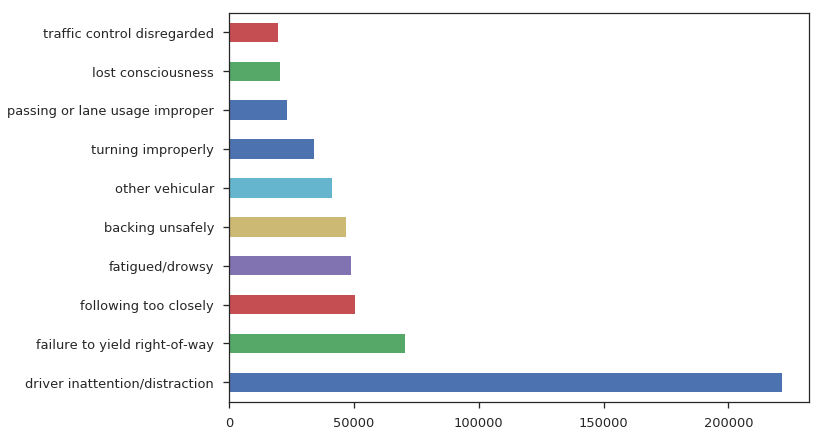

In [18]:
#Top 10 contributing factors to accidents
df_accidents['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:11].plot(kind='barh')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f86cf885cf8>,
      dtype=object)

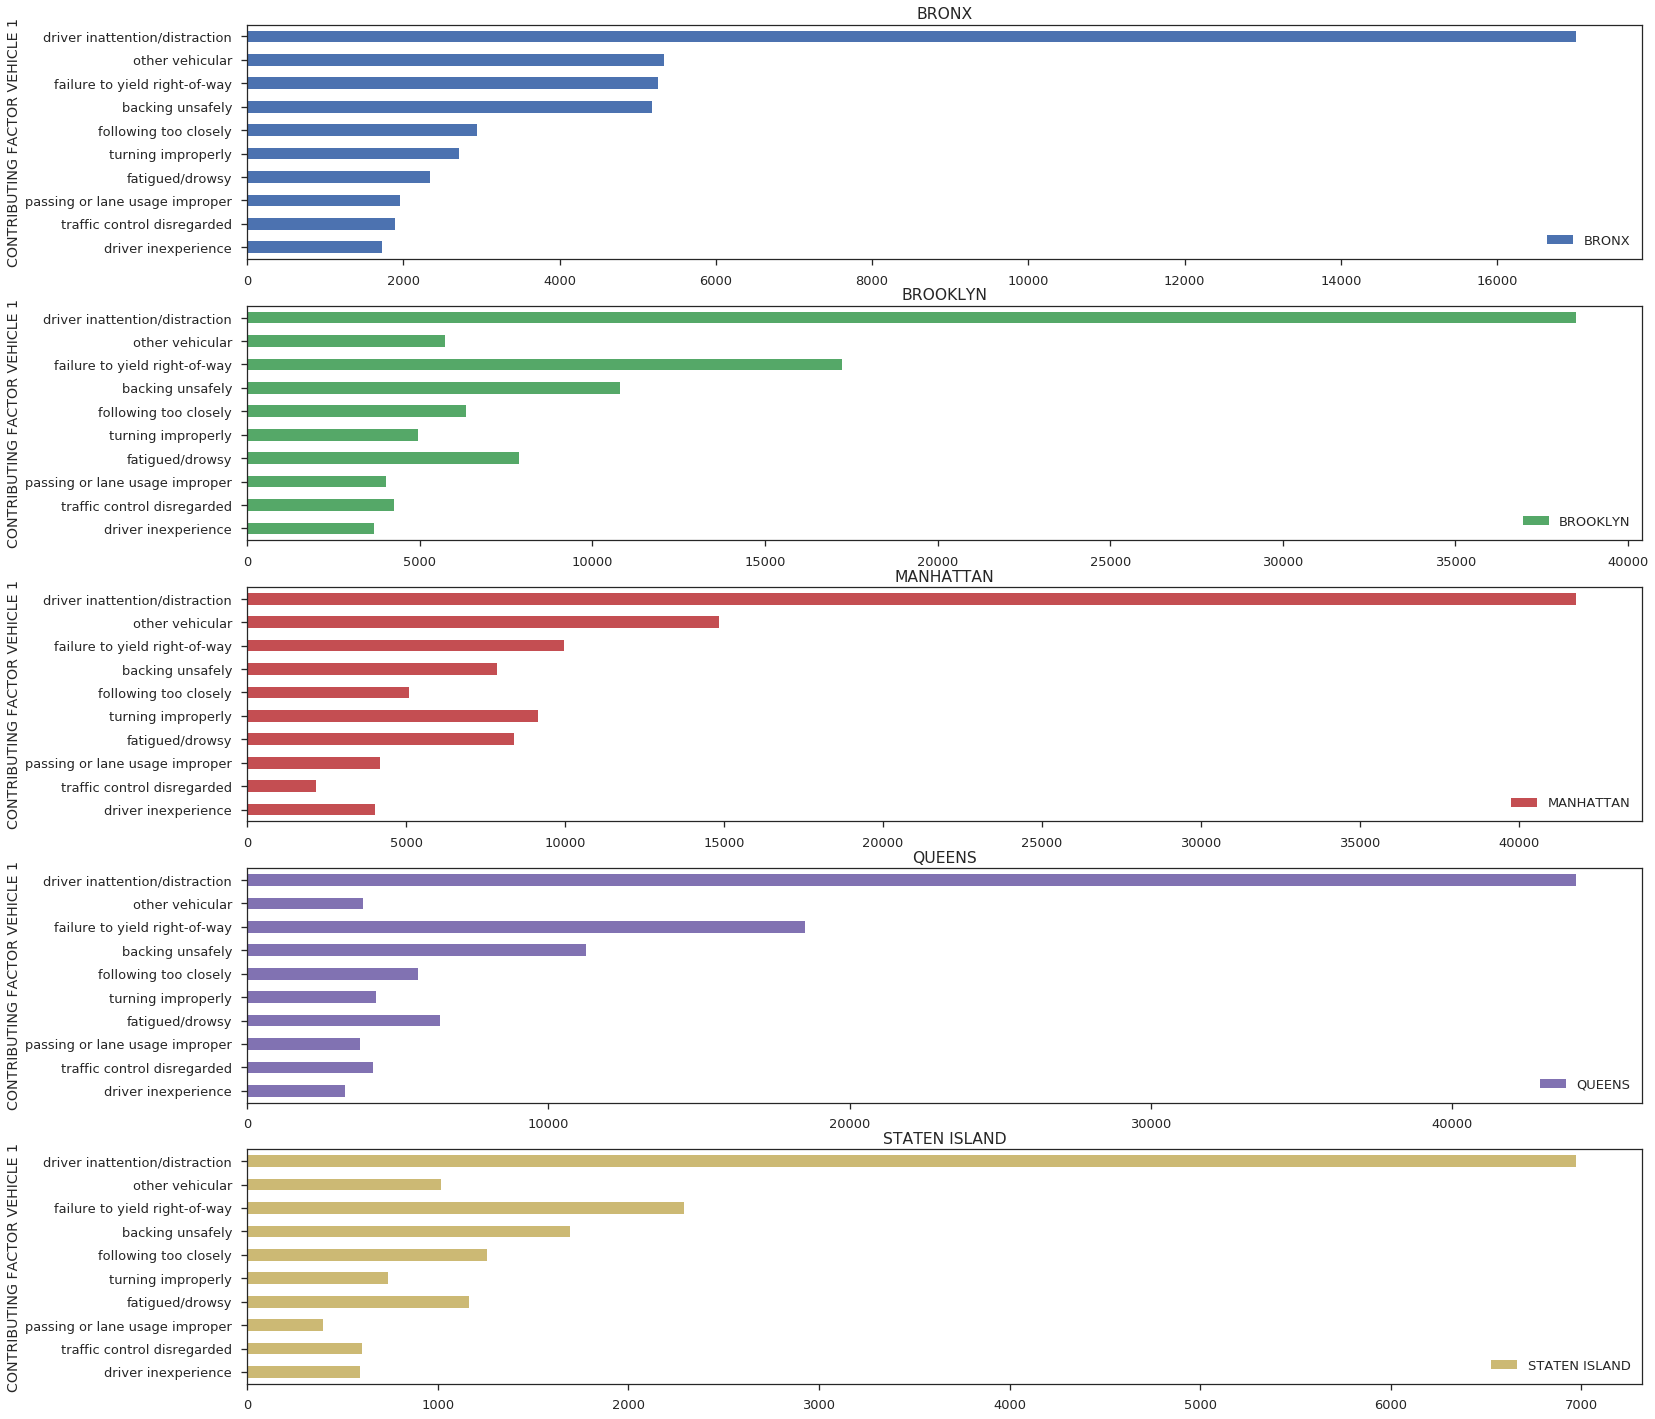

In [19]:
#plotting the top 10 most occuring accidents by borough
pivot.tail(10).plot(kind='barh', subplots=True, figsize=(25, 25), sharex=False)

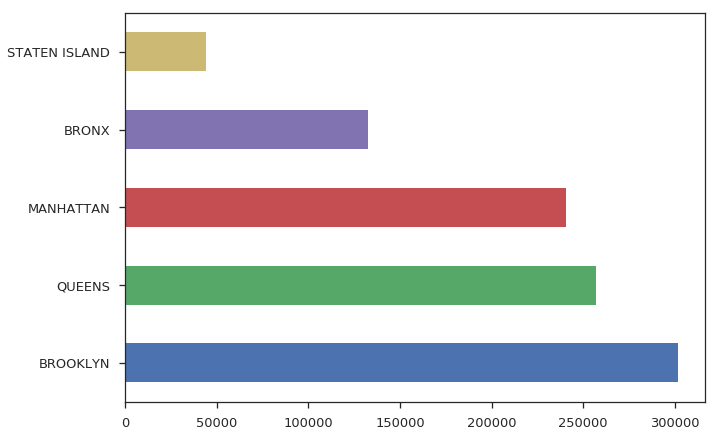

In [20]:
#number of collisions per borough
df_accidents.BOROUGH.value_counts().plot(kind='barh')

In [21]:
#normalizing the date
df_accidents.DATE = pd.to_datetime(df_accidents.DATE, format="%m/%d/%Y")

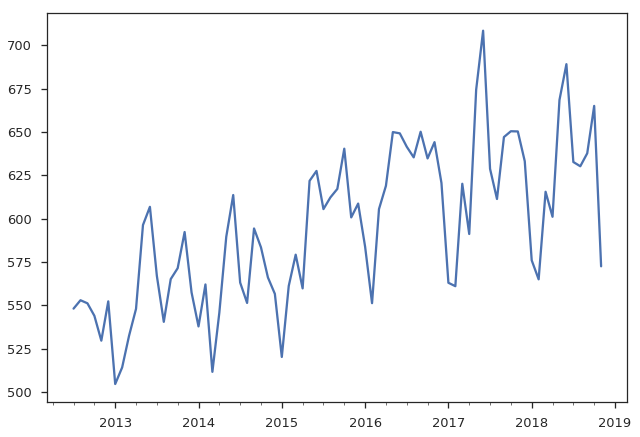

In [22]:
#Number of accidents per day per month
(
    df_accidents.DATE
    .value_counts() 
    .sort_index() 
    .resample('1M') # compute the mean number of accidents/day over a period of a year
    .mean() 
    .plot()
)

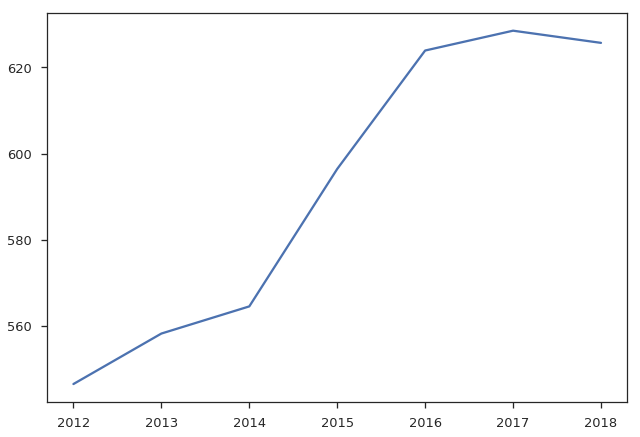

In [23]:
#Number of accidents per day per year
(
    df_accidents.DATE
    .value_counts()
    .sort_index() 
    .resample('1A') # anuualy
    .mean() 
    .plot() 
)

In [24]:
#borough accidents over time 
pivot3 = pd.pivot_table(
    data = df_accidents,
    index = 'DATE', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
).fillna(0)

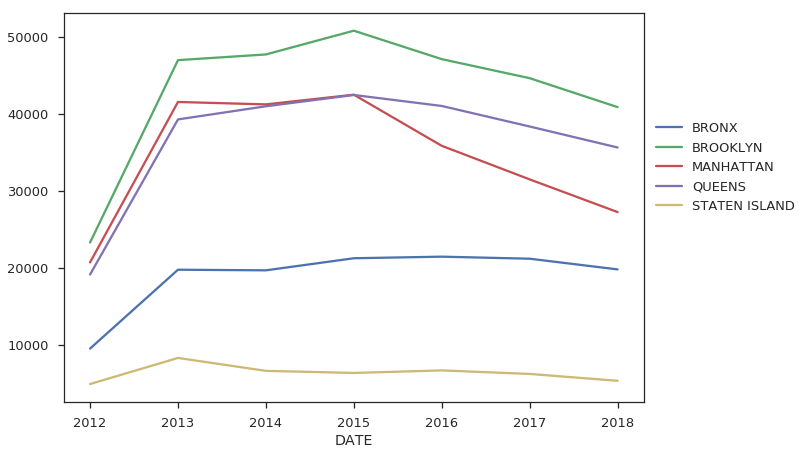

In [25]:
#total per year
pivot3.resample('A').sum().plot().legend(bbox_to_anchor=(1, 0.75))

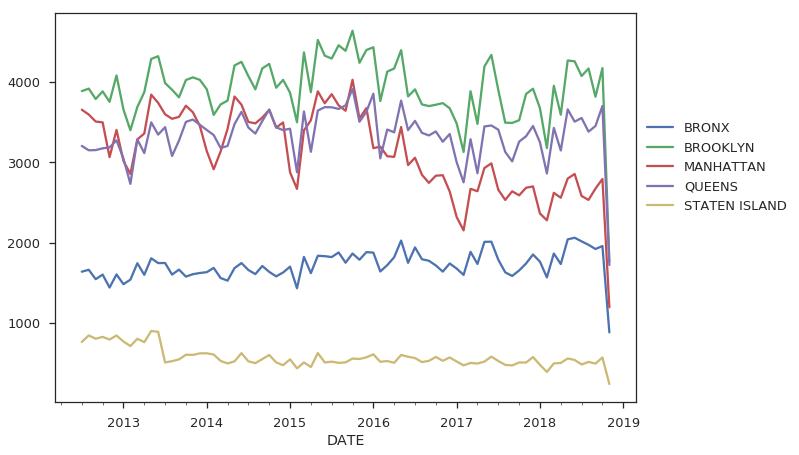

In [26]:
#total per month
pivot3.resample('M').sum().plot().legend(bbox_to_anchor=(1, 0.75))

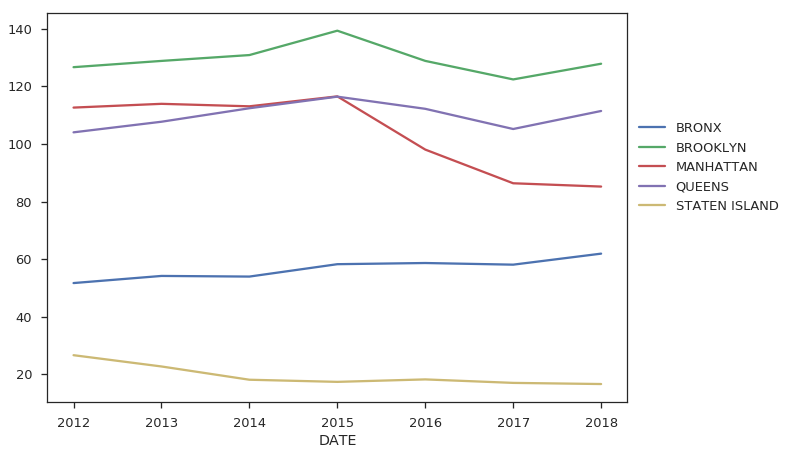

In [27]:
#on average per year
pivot3.resample('A').mean().plot().legend(bbox_to_anchor=(1, 0.75))

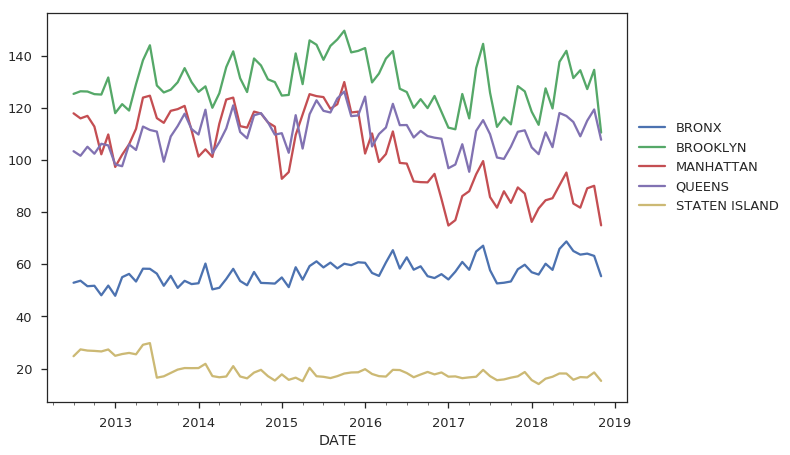

In [28]:
#on average per month
pivot3.resample('M').mean().plot().legend(bbox_to_anchor=(1, 0.75))

In [ ]:
#map of people killed due to accidents
base = df_accidents[ (df_accidents.LATITUDE>40) & (df_accidents.LATITUDE<41) & (df_accidents.LONGITUDE> -74.6) & (df_accidents.LONGITUDE<-50) ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7),
    s = 0.5, 
    alpha = 0.05
)

df_accidents[ (df_accidents.LATITUDE>40) & (df_accidents.LATITUDE<41) & (df_accidents.LONGITUDE> -74.6) & (df_accidents.LONGITUDE<-50)
    & (df_accidents["NUMBER OF PERSONS KILLED"]>0)
  ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (10,7), color = 'red', marker = 'x', s=3,
    ax = base

)

The graph below shows the same background made up of all the accidents that happened in NYC as blue points on this scatter plot. This time, the red dots symbolize people injured. 

However, this graph is not as effective as the previous one. We thought it was going to provide as valuable of a data, but it showed that most of the accidents ended up in a person being injured. There are too many red dots on the graph for us to be able to draw any kinds of valuable insights. 

In [ ]:
#map of people injured 
base = df_accidents[ (df_accidents.LATITUDE>40) & (df_accidents.LATITUDE<41) & (df_accidents.LONGITUDE> -74.6) & (df_accidents.LONGITUDE<-50) ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (15,10),
    s = 0.5,  
    alpha = 0.05
)

df_accidents[ (df_accidents.LATITUDE>40) & (df_accidents.LATITUDE<41) & (df_accidents.LONGITUDE> -74.6) & (df_accidents.LONGITUDE<-50)
    & (df_accidents["NUMBER OF PERSONS INJURED"]>0)
  ].plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE', figsize = (15,10), color = 'red', marker = 'x', s=0.1, 
    ax = base,
    alpha = 0.02
)


## Spatial Analysis Continued: KDE

As shown in the previous graph, it is difficult to affectively show density in a scatter plot. One of the only things through which it can be implemented is the alpha value. However, even after changing the alpha value on numerous occasions, it is still far from perfect. The type of graph that is much better suited for the task of showing the density of the accidents is the KDE plot. 

At first, we used geopandas to fascilitate the outline of New York City so that the KDE plot can show where most accidents are concentrated. As one can see below, the darker shades of blue on the KDE plot indicated that the most dense area for the number of accidents is lower Manhattan. 

We had to limit the data frame on which the KDE plot was formed just to three attributes: Latitude, Longitude, and Borough and we also cleaned all the empty values with the .dropna() method. The other attributes had to be removed due to the fact that they had to many missing values. 

One may notice that instead of running the KDE plot on all the points that we have, we only decided to run it on a sample of 100000 values. This is due to the fact that calculating a KDE graph is a very expensive and difficult operation that takes much more time as the input increases. Therefore we decided to use the .sample() method that ensures a representative sample while not sacrificing on time. 

In [ ]:
#reduce the database to 3 attributes only, since others have too many NaN 

df_accidents_reduced = df_accidents[['LATITUDE', 'LONGITUDE', 'BOROUGH']].copy()

clean_mask = (df_accidents_reduced.LATITUDE > 40) & (df_accidents_reduced.LATITUDE < 41) & (df_accidents_reduced.LONGITUDE < -72) & (df_accidents_reduced.LONGITUDE > -74.5)
df_accidents_reduced_clean = df_accidents_reduced[ clean_mask ]

df_accidents_reduced_clean_final = df_accidents_reduced_clean.dropna()

df_accidents_reduced_clean_final.head(5)

In [ ]:
#plot a KDE plot for the whole of NYC

df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')
nyc_plot = df_nyc.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(25, 20))
base = nyc_plot
sample = df_accidents_reduced_clean_final.sample(100000)

nyc_accidents_plot = sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100, # controls the resolution
            cmap=plt.cm.Blues,  # color scheme
            shade=True, # whether to have a density plot (True), or just the contours (False)
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20, ax = base
                            
)
nyc_accidents_plot

## Spatial Analysis Continued: KDE per Borough

Even though the graph above is a major improvement over the scatter plot in terms of showing the density of collisions, it is also limited in what it can show. Since all the boroughs were taken into account, Manhattan was the clear winner due to its unprecedented density of population and accidents. 

This resulted the other areas shown more washed away and it is difficult to distinguish where the locations of interest are different boroughs. Therefore, we decided to do a KDE plot for the three boroughs with the most vehicle collisions: Brooklyn, Queens, and Manhattan.

As one can see directly below, by limiting the information by Borough, even in Manhattan we see much more detail. Now, it is clear that there are two major hubs in which these accidents occur: one all the way in lower Manhattan, and the second expanding into midtown. 

In [ ]:
#Manhattan

df_accidents_reduced_clean_final_m = df_accidents_reduced_clean_final.loc[df_accidents_reduced_clean_final['BOROUGH'] == 'MANHATTAN']

df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')
df_manhattan = df_nyc[df_nyc.boro_name =='Manhattan']
manhattan_plot = df_manhattan.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

base = manhattan_plot
sample = df_accidents_reduced_clean_final_m.sample(10000)

nyc_manhattan_plot = sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100, # controls the resolution
            cmap=plt.cm.Blues,  # color scheme
            shade=True, # whether to have a density plot (True), or just the contours (False)
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20, ax = base
                            
)
nyc_manhattan_plot

Brooklyn's accidents are much more spread out. It does not have such dark shades of blue as Manhattan other than the little concentrated hub in the upper left corner in Brooklyn. It is also accompanied by several others to the right even though none of them are as heavily concentrated.


In [ ]:
# Now Brooklynn

df_accidents_reduced_clean_final_b = df_accidents_reduced_clean_final.loc[df_accidents_reduced_clean_final['BOROUGH'] == 'BROOKLYN']

df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')
df_brooklyn = df_nyc[df_nyc.boro_name =='Brooklyn']
brooklyn_plot = df_brooklyn.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

base = brooklyn_plot
sample = df_accidents_reduced_clean_final_b.sample(10000)

nyc_brooklyn_plot = sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100, # controls the resolution
            cmap=plt.cm.Blues,  # color scheme
            shade=True, # whether to have a density plot (True), or just the contours (False)
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20, ax = base
                            
)
nyc_brooklyn_plot

Finally, Queens has probably the most distinguished areas of collisions concentration. There are four major hubs like that all of which are represented in a very dark blue hue. Please see below.

This spacial analysis using KDE on separate Boroughs is extremely helpful. Due to the fact that areas of high collision concentration can be pinpointed on a map in such simple fashion, the NYPD as well as other authorities can take the needed measures in order to dissolve these high-accident-areas.


In [ ]:
# Finaly Queens

df_accidents_reduced_clean_final_q = df_accidents_reduced_clean_final.loc[df_accidents_reduced_clean_final['BOROUGH'] == 'QUEENS']

df_nyc = gpd.GeoDataFrame.from_file('nyc-neighborhoods.geojson')
df_queens = df_nyc[df_nyc.boro_name =='Queens']
queens_plot = df_queens.plot(linewidth=0.5, color='White', edgecolor='Black', figsize=(15, 10))

base = queens_plot
sample = df_accidents_reduced_clean_final_q.sample(10000)

nyc_queens_plot = sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, 
            gridsize=100, # controls the resolution
            cmap=plt.cm.Blues,  # color scheme
            shade=True, # whether to have a density plot (True), or just the contours (False)
            alpha = 0.5,
            shade_lowest=False, 
            n_levels=20, ax = base
                            
)
nyc_queens_plot

Therefore, we were able to draw useful conclusions from the data that NYC Open Data has on their servers. We were able to identify the most important reasons for collisions, some of which may be reduced by NYC’s municipality making changes to the driving courses’ materials. Moreover, we identified the general trends both for NYC as a whole as well as for all the boroughs clearly showing that the number of accidents has been rising from 2012 to 2018. Finally, we performed a complicated spatial analysis through the use of geopandas, a 2d scatterplot-map representation of New York City, as well as the Kernel Density Estimation graph that showed the areas within the city that have the highest density of accidents thus struggling the most from constant motor vehicle collisions.